# #1. Login to instagram handle

In [1]:
def login(user_name, pass_word):
    username = user_name
    password = pass_word
    
    wait.until(EC.visibility_of_element_located((By.TAG_NAME, 'input')))
    login_box = driver.find_elements_by_tag_name('input')
    username_box = login_box[0]
    password_box = login_box[1]
    
    username_box.send_keys(username) # passing username
    password_box.send_keys(password) # passing password
    
    login_button = driver.find_elements_by_tag_name('button')[1]
    login_button.click() # clicking login button

# #2. List of food handles

In [2]:
def food_Handles():
    ## Notification PoP up
    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'aOOlW')))
    
    # notification permission
    notification_denial_button = driver.find_elements_by_class_name('aOOlW')[1]
    notification_denial_button.click()

    # searching for food
    search = 'food'
    search_box = driver.find_element_by_class_name('XTCLo')
    search_box.send_keys('food')

    wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'Ap253')))
    food_handle_list = driver.find_elements_by_class_name('Ap253')

    # printing names of Instagram Handles after displaying in list after typing food
    food_handles_list = list()
    for food_handle in food_handle_list:
        food_handles_list.append(food_handle.get_attribute('innerHTML').strip('#'))
    return food_handles_list

# #3. Top 5 food handles based upon followers

In [3]:
def top_5(FoodHandleList, follower_num_list):
    food_handle_dic = dict()
    baseURL = 'https://www.instagram.com/'
    
    for foodHandle in FoodHandleList[ : 10]:
        URL = baseURL + foodHandle + '/'
        driver.get(URL)
        dataOfHandle = driver.find_elements_by_class_name('g47SY')
        follower_nums = dataOfHandle[1].get_attribute('title')
        if ',' in follower_nums:
            temp = follower_nums.split(',')
            follower_nums = temp[0].strip() + temp[1].strip()
        else:
            follower_nums = follower_nums.strip()
        food_handle_dic[foodHandle] = int(follower_nums)
        follower_num_list.append(int(follower_nums))
    follower_num_list.sort()
    
    print('Top 5 Food Handles based upon number of followers : ')
    return food_handle_dic

# #4. Find the number of posts these handles have done in the previous 3 days

In [12]:
def past_three_posts(handle):
    driver.get('https://www.instagram.com/' + handle + '/')
    posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_9AhH0')))
    
    post_num = 0
    posts[post_num].click()
    while True:
        time.sleep(5)
        wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_1o9PC')))
        t = driver.find_element_by_class_name('_1o9PC')
        t = t.get_attribute('innerHTML')
        if ('hour' in t) or ('minute' in t) or ('second' in t) or (t == '1 day ago') or (t == '2 days ago') or (t == '3 days ago'):
            post_num += 1
            next_post = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next_post.click()
        else:
            break
    
    print(handle, " : Total Posts : " , post_num)
    return post_num

# #5. Depict this information using a suitable graph.

In [13]:
def top_5_analysis(food_handles, food_handle_post_count):
    plt.scatter(food_handles, food_handle_post_count, s = [follower_num_list[i] for i in range(4, -1, -1)] , c = np.arange(5), edgecolor = 'r')
    plt.xlabel('Food Handle')
    plt.ylabel('Number Of Posts for past 3 days')
    plt.title('Food Handle Vs Posts, Bubble size represnts followers')
    plt.xticks(rotation = 90)
    plt.show()
    return food_handles

# #6. Most frequent hashtags

In [14]:
def most_frequent_words(top_5_handles):
    word_list = list()
    for handle in top_5_handles:
        driver.get('https://www.instagram.com/' + handle + '/')
        time.sleep(7)
        posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_9AhH0')))
        posts[0].click()
        count = 0
        while count <= 2:
            text_list = driver.find_elements_by_class_name('xil3i')
            for text in text_list:
                word_list.append(text.get_attribute('innerHTML').strip('#'))
            count += 1
            next_post = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next_post.click()
            time.sleep(6)
    return word_list

# #7. Create CSV file

In [15]:
def create_csv(word_list):
    dic = dict()
    for i in range(len(word_list)):
        word = word_list[i]
        for words in word_list:
            if word in words:
                dic[word] = dic.get(word, 0) + 1
    word = []
    freq = []
    sorted_dic = sorted(dic.items(), key = lambda key : key[1])
    for e in sorted_dic:
        word.append(e[0])
        freq.append(e[1])
    df_list = list()
    for i in range(len(word)):
        df_list.append([word[i], freq[i]])
    df = pd.DataFrame(df_list, columns = ['WORDS' , 'FREQUENCY'])
    df.to_csv('Word_file.csv')

# #8. Most popular hashtags

In [21]:
def mostPopularHashtags(hashtag_list):
    hashtag_dic = dict()
    for tag in hashtag_list:
        hashtag_dic[tag] = hashtag_dic.get(tag, 0) + 1
    sorted_dic = sorted(hashtag_dic.items(), key = lambda key : key[1])
    print("\ntop 10 hashtags with frequency of use: ")
    count = 0
    top_hashtags = dict()
    for i in range(len(sorted_dic) - 1, -1, -1):
        if count == 10:
            break
        print(sorted_dic[i][0], " : ", sorted_dic[i][1])
        top_hashtags[sorted_dic[i][0]] = sorted_dic[i][1]
        count += 1
    return top_hashtags

# #9. Pie chart Of top 5 hashtags

In [22]:
def pie_chart(top_hashtags):
    import matplotlib.pyplot as plt
    tags = list()
    freq = list()
    for e in top_hashtags:
        if len(tags) == 5:
            break
        tags.append(e)
        freq.append(top_hashtags[e])
    plt.pie(freq, labels = tags, autopct = "%.2f%%")
    plt.show()

# #7. Followers : Likes

In [23]:
def followers_likes(handle , like_dic):
    driver.get('https://www.instagram.com/' + handle + '/')
    posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_9AhH0')))
    
    Total_likes = 0
    posts[0].click()
    i = 0
    Total_likes = 0
    while i < 10:
        time.sleep(5)
        like = driver.find_elements_by_class_name('_8A5w5')
        for e in like:
            st = e.get_attribute('innerHTML').strip()
            if 'like' in st:
                like_list = st.strip('<span>').strip('like').strip().strip('</span>').split(',')
                l = ''
                for j in like_list:
                    l += j
                Total_likes += int(l)
                i += 1
        next_post = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
        next_post.click()
        
    like_dic[handle] = Total_likes

# #4. Main

Top 5 Food Handles based upon number of followers : 
mumbaifoodie  : Total Followers :  445283
foodtalkindia  : Total Followers :  295140
foodiesince96  : Total Followers :  245978
iamdatingfood  : Total Followers :  208868
food_lunatic  : Total Followers :  76589

mumbaifoodie  : Total Posts :  6
foodtalkindia  : Total Posts :  4
foodiesince96  : Total Posts :  11
iamdatingfood  : Total Posts :  9
food_lunatic  : Total Posts :  11


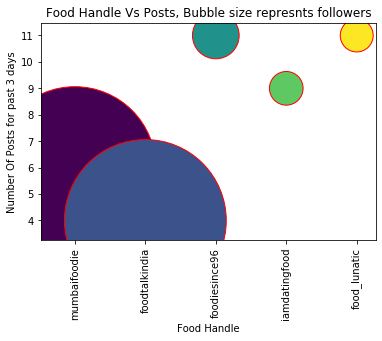


top 10 hashtags with frequency of use: 
foodiesince96  :  5
quarantine  :  5
delhifoodblogger  :  4
delhifoodie  :  4
food  :  4
indianfoodbloggers  :  4
MumbaiFoodie  :  4
foodphotography  :  3
foodtalkindia  :  3
indianfoodie  :  2
Pie chart of top_hashtags vs number of uses of these tags


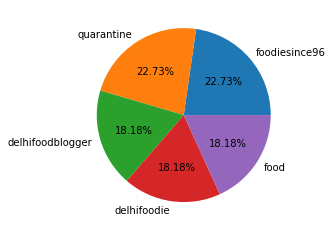


Likes of the top 10 posts of the 5 handles : 
{'mumbaifoodie': 30042, 'foodtalkindia': 5587, 'foodiesince96': 31079, 'iamdatingfood': 36547, 'food_lunatic': 10544} 



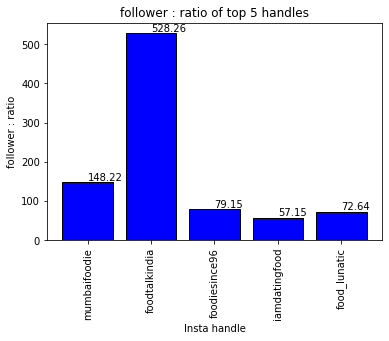

In [24]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome(executable_path = r"C:\Users\user\Downloads\web driver\chromedriver.exe")
driver.get('https://www.instagram.com/')
wait = WebDriverWait(driver, 500)

## loging in Instagram
username = 'SAMPLE USERNAME'
password = 'SAMPLE PASSWORD'
login(username, password)

## turn off notification if it is on in your browser
## Do not do anything with the notification allowance. code will perform the task

FoodHandleList = food_Handles()

follower_num_list = list()
food_handle_dic = top_5(FoodHandleList, follower_num_list)

sorted_dic = sorted(food_handle_dic.items(), key = lambda key : key[1])
for i in range(len(sorted_dic) - 1, len(sorted_dic) - 6 , -1):
    print(sorted_dic[i][0], " : Total Followers : " , sorted_dic[i][1])
print()

food_handle_post_count = list()
food_handles = list()
for i in range(len(sorted_dic) - 1, len(sorted_dic) - 6, -1):
    food_handle_post_count.append(past_three_posts(sorted_dic[i][0]))
    food_handles.append(sorted_dic[i][0])
    
top_5_handles = top_5_analysis(food_handles, food_handle_post_count)

word_list = most_frequent_words(top_5_handles)

create_csv(word_list)

top_hashtags = mostPopularHashtags(word_list)

print('Pie chart of top_hashtags vs number of uses of these tags')
pie_chart(top_hashtags)

like_dic = dict()
for handle in top_5_handles:
    followers_likes(handle , like_dic)
    
print('\nLikes of the top 10 posts of the 5 handles : ')
print(like_dic, '\n')
avg_like = dict()
for e in like_dic:
    avg_like[e] = like_dic[e]/10

follower_like_ratio = dict()
for handle in top_5_handles:
    follower_like_ratio[handle] = food_handle_dic[handle]/avg_like[handle]
    
plt.bar([handle for handle in top_5_handles], [follower_like_ratio[handle] for handle in top_5_handles], 
        color = 'blue', edgecolor = 'black')
plt.xlabel('Insta handle')
plt.ylabel('follower : ratio')
for handle in top_5_handles:
    plt.text(handle, follower_like_ratio[handle] + 5, format(follower_like_ratio[handle], ".2f"))
plt.title('follower : ratio of top 5 handles')
plt.xticks(rotation = 90)
plt.show()
driver.close()